<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Week 19 Lab</h1>
</div>

For this lab, we'll be using the `flights.txt` file located in `/datasets`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Part 1**

Open `../datasets/flights.txt`. Use the methods we've learned in class to analyze the dataset from the top-level (see how many rows it has, how many null values, what columns are necessary, etc.).

**a.** read the file into a dataframe (hint: as a csv)

In [3]:
flights = pd.read_csv("flights.txt", sep="|")

**b.** Find the memory usage programmatically (hint: use `help`)

In [4]:
memory = flights.memory_usage().sum()/1000000
f"the total memory in MB is {memory}"

'the total memory in MB is 16.800128'

**c.** Find the number of missing entries for each column.

In [5]:
flights.isna().sum().sort_values(ascending=False)

arr_delay         2146
air_time          2146
arr_time          1964
dep_time          1894
dep_delay         1894
tailnum            547
Unnamed: 0.1         0
year                 0
month                0
day                  0
sched_dep_time       0
time_hour            0
sched_arr_time       0
minute               0
carrier              0
flight               0
origin               0
dest                 0
distance             0
hour                 0
Unnamed: 0           0
dtype: int64

**d.** What columns are unnecessary? Remove them so that the `df` doesn't include them.

In [6]:
#the unnamed columns seem unnecesary because we don't have a context of what they stand for
#in the dataframe
flights = flights.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

**e.** Carrier/airline information is located below. Use the information in there to create a new column with a human-readable airline name.

```
"9E" "Endeavor Air Inc.",
"AA" "American Airlines Inc.",
"AS" "Alaska Airlines Inc.",
"B6" "JetBlue Airways",
"DL" "Delta Air Lines Inc.",
"EV" "ExpressJet Airlines Inc.",
"F9" "Frontier Airlines Inc.",
"FL" "AirTran Airways Corporation",
"HA" "Hawaiian Airlines Inc.",
"MQ" "Envoy Air",
"OO" "SkyWest Airlines Inc.",
"UA" "United Air Lines Inc.",
"US" "US Airways Inc.",
"VX" "Virgin America",
"WN" "Southwest Airlines Co.",
"YV" "Mesa Airlines Inc.",

```

In [7]:
values = {"9E":"Endeavor Air Inc.",
"AA":"American Airlines Inc.",
"AS":"Alaska Airlines Inc.",
"B6":"JetBlue Airways",
"DL":"Delta Air Lines Inc.",
"EV":"ExpressJet Airlines Inc.",
"F9":"Frontier Airlines Inc.",
"FL":"AirTran Airways Corporation",
"HA":"Hawaiian Airlines Inc.",
"MQ":"Envoy Air",
"OO":"SkyWest Airlines Inc.",
"UA":"United Air Lines Inc.",
"US":"US Airways Inc.",
"VX":"Virgin America",
"WN":"Southwest Airlines Co.",
"YV":"Mesa Airlines Inc."}

flights['airline_name'] = flights['carrier'].map(values)

In [8]:
flights = flights.reindex(['year',
 'month',
 'day',
 'dep_time',
 'sched_dep_time',
 'dep_delay',
 'arr_time',
 'sched_arr_time',
 'arr_delay',
 'carrier',
 'airline_name',
 'flight',
 'tailnum',
 'origin',
 'dest',
 'air_time',
 'distance',
 'hour',
 'minute',
 'time_hour'],axis=1)

In [9]:
pd.options.display.max_colwidth = 100

In [10]:
flights[["carrier","airline_name"]]

,carrier,airline_name
0,UA,United Air Lines Inc.
1,UA,United Air Lines Inc.
2,AA,American Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
...,...,...
99995,EV,ExpressJet Airlines Inc.
99996,9E,Endeavor Air Inc.
99997,B6,JetBlue Airways
99998,UA,United Air Lines Inc.


**Part 2** 

Now we need to fix the missing rows and values.



In [11]:
flights.isna().sum().sort_values(ascending=False)

arr_delay         2146
air_time          2146
arr_time          1964
dep_time          1894
dep_delay         1894
tailnum            547
time_hour            0
month                0
day                  0
sched_dep_time       0
sched_arr_time       0
carrier              0
minute               0
airline_name         0
flight               0
origin               0
dest                 0
distance             0
hour                 0
year                 0
dtype: int64

**a.** Check out the rows missing values for "dep_delay". Can we keep them? If not, remove those rows.

(note: we're only interested in rows with flight time information)

In [12]:
flights.dropna(subset=["dep_delay"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98106 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            98106 non-null  int64  
 1   month           98106 non-null  int64  
 2   day             98106 non-null  int64  
 3   dep_time        98106 non-null  float64
 4   sched_dep_time  98106 non-null  int64  
 5   dep_delay       98106 non-null  float64
 6   arr_time        98036 non-null  float64
 7   sched_arr_time  98106 non-null  int64  
 8   arr_delay       97854 non-null  float64
 9   carrier         98106 non-null  object 
 10  airline_name    98106 non-null  object 
 11  flight          98106 non-null  int64  
 12  tailnum         98106 non-null  object 
 13  origin          98106 non-null  object 
 14  dest            98106 non-null  object 
 15  air_time        97854 non-null  float64
 16  distance        98106 non-null  int64  
 17  hour            98106 non-null 

**b.** Now check out the rows missing "arr_time". Can we keep them? Drop them if not.

In [13]:
flights.dropna(subset=["dep_delay"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98106 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            98106 non-null  int64  
 1   month           98106 non-null  int64  
 2   day             98106 non-null  int64  
 3   dep_time        98106 non-null  float64
 4   sched_dep_time  98106 non-null  int64  
 5   dep_delay       98106 non-null  float64
 6   arr_time        98036 non-null  float64
 7   sched_arr_time  98106 non-null  int64  
 8   arr_delay       97854 non-null  float64
 9   carrier         98106 non-null  object 
 10  airline_name    98106 non-null  object 
 11  flight          98106 non-null  int64  
 12  tailnum         98106 non-null  object 
 13  origin          98106 non-null  object 
 14  dest            98106 non-null  object 
 15  air_time        97854 non-null  float64
 16  distance        98106 non-null  int64  
 17  hour            98106 non-null 

**c.** Now let's check out the rows missing `air_time`. Can we keep them? Drop them if not.

In [14]:
#gets rid of all the rows that have missing values
flights.dropna(inplace=True)   #to ask

**Part 3**

Making observations of what we have.

**a.** What flight was the longest? Where did it leave from and where did it land?

You might need to look up airport codes.

In [15]:
#JFK (New York) - HNL (Honolulu): 4983  #to ask
flights.groupby("distance")[["origin","dest"]].sum().sort_values("distance",ascending=False).iloc[0]

origin    JFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFKJFK...
dest      HNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNLHNL...
Name: 4983, dtype: object

**b.** What flight was the shortest?

In [16]:
#EWR (New Jersey) - PHL (Philadelphia) : 80
flights.groupby("distance")[["origin","dest"]].sum().sort_values("distance",ascending=False).iloc[-1]

origin    EWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWREWR
dest      PHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHLPHL
Name: 80, dtype: object

**c.** What airline flied the most during this period?

hint: `.size()`

In [17]:
#United Air Lines Inc.
flights["airline_name"].value_counts().to_frame().iloc[0]

airline_name    17353
Name: United Air Lines Inc., dtype: int64

**d.** Which destination was most flown to?

In [50]:
flights["dest"].value_counts().to_frame().iloc[0]

dest    5036
Name: ATL, dtype: int64

In [20]:
#To get the amount of times
flights.groupby("dest").size().sort_values(ascending=False).iloc[0]

5036

**e.** Which location was flown from the most?

In [69]:
flights["origin"].value_counts()
#.to_frame().iloc[0]

EWR    34766
JFK    31855
LGA    31233
Name: origin, dtype: int64

**f.** Which flight had the longest departure delay?

In [22]:
flights[flights["dep_delay"]== flights["dep_delay"].max()]["flight"]

7072    51
Name: flight, dtype: int64

**g.** Which flight had the longest arrival delay? Should match the previous.

In [23]:
flights[flights["arr_delay"]== flights["arr_delay"].max()]["flight"]

7072    51
Name: flight, dtype: int64

**h.** Which airline had the longest arrival delays on average?

In [28]:
flights.groupby(["airline_name"])["arr_delay"].mean().to_frame().iloc[0]

arr_delay    15.779932
Name: AirTran Airways Corporation, dtype: float64

**i.** Which airline had the longest departure delays on average?

In [29]:
flights.groupby(["airline_name"])["dep_delay"].mean().to_frame().iloc[0]

dep_delay    13.59179
Name: AirTran Airways Corporation, dtype: float64

**j.** Which aircraft (going by tailnumber) flew the most?

In [36]:
flights.groupby("tailnum").size().sort_values(ascending=False).to_frame().iloc[0]

0    149
Name: N0EGMQ, dtype: int64

**Bonus:** What day had the most flights?

In [48]:
flights["day"].value_counts().to_frame().iloc[0]

day    3813
Name: 18, dtype: int64

**Part 4**

Using one (or more) of the exercises from **Part 3**, plot the information in a matplotlib chart that has correct ticks, labels, titles and axis. Also ensure that the chart type that you use is the correct one for plotting the data you're using. Create a chart you would proudly show an employer.

TypeError: bar() missing 1 required positional argument: 'height'

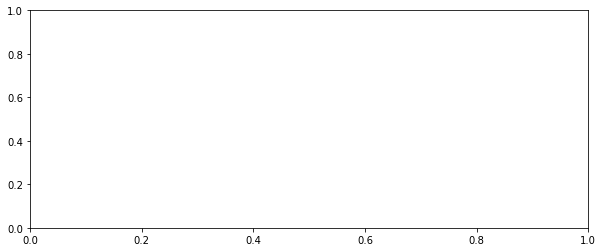

In [68]:
fig, ax1 = plt.subplots(figsize=(10, 4))
# x= flights["airline"]
ax1.bar(flights["origin"].value_counts())

In [55]:
flights_dest = dict(flights["dest"].value_counts().to_frame())
flights_dest

{'dest': ATL    5036
 ORD    4908
 LAX    4689
 BOS    4511
 CLT    4165
        ... 
 HDN       4
 BZN       4
 JAC       2
 EYW       1
 LEX       1
 Name: dest, Length: 101, dtype: int64}

In [62]:
flights["dest"].value_counts().sort_values(ascending=False).plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x10a47baf0>>

In [ ]:
airlines = list(dictio.values())
 = list(data.keys())